# EventVestor: Earnings Calendar

In this notebook, we'll take a look at EventVestor's *Earnings Calendar* dataset, available on the [Quantopian Store](https://www.quantopian.com/store). This dataset spans January 01, 2007 through the current day, and documents the quarterly earnings releases calendar indicating date and time of reporting.

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Free samples and limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase acess to the full set.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [2]:
# import the dataset
from quantopian.interactive.data.eventvestor import earnings_calendar as dataset

# or if you want to import the free dataset, use:
# from quantopian.data.eventvestor import earnings_calendar_free

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.dshape

dshape("""var * {
  event_id: float64,
  trade_date: ?datetime,
  symbol: string,
  event_type: ?string,
  event_headline: ?string,
  event_phase: float64,
  calendar_date: ?datetime,
  calendar_time: ?string,
  event_rating: float64,
  sid: int64,
  asof_date: datetime,
  timestamp: datetime
  }""")

In [4]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

136400

In [5]:
# Let's see what the data looks like. We'll grab the first three rows.
dataset[:3]

,event_id,trade_date,symbol,event_type,event_headline,event_phase,calendar_date,calendar_time,event_rating,sid,asof_date,timestamp
0,1969337,2007-01-03,AA,Earnings Calendar,Alcoa to Report Quarterly Financial Results on...,NaN,2007-01-10,Before Market Open,1,2,2007-01-03,2007-01-04
1,1969338,2007-01-03,ABT,Earnings Calendar,Abbott Laboratories to Report Quarterly Financ...,NaN,2007-01-24,Before Market Open,1,62,2007-01-03,2007-01-04
2,1969341,2007-01-03,AEPI,Earnings Calendar,AEP Industries to Report Quarterly Financial R...,NaN,2007-01-10,After Market Close,1,162,2007-01-03,2007-01-04


Let's go over the columns:
- **event_id**: the unique identifier for this event.
- **asof_date**: EventVestor's timestamp of event capture.
- **trade_date**: for event announcements made before trading ends, trade_date is the same as event_date. For announcements issued after market close, trade_date is next market open day.
- **symbol**: stock ticker symbol of the affected company.
- **event_type**: this should always be *Earnings Calendar*.
- **event_headline**: a brief description of the event
- **event_phase**: the inclusion of this field is likely an error on the part of the data vendor. We're currently attempting to resolve this.
- **calendar_date**: proposed earnings reporting date
- **calendar_time**: earnings release time: *before/after market hours*, or *other*.
- **event_rating**: this is always 1. The meaning of this is uncertain.
- **timestamp**: this is our timestamp on when we registered the data.
- **sid**: the equity's unique identifier. Use this instead of the symbol.

We've done much of the data processing for you. Fields like `timestamp` and `sid` are standardized across all our Store Datasets, so the datasets are easy to combine. We have standardized the `sid` across all our equity databases.

We can select columns and rows with ease. Below, we'll fetch all of Apple's entries from 2012.

In [6]:
# get apple's sid first
aapl_sid = symbols('AAPL').sid
aapl_earnings = earnings_calendar[('2011-12-31' < earnings_calendar['asof_date']) & (earnings_calendar['asof_date'] <'2013-01-01') & (earnings_calendar.sid==aapl_sid)]
# When displaying a Blaze Data Object, the printout is automatically truncated to ten rows.
aapl_earnings.sort('asof_date')

,event_id,trade_date,symbol,event_type,event_headline,event_phase,calendar_date,calendar_time,event_rating,sid,asof_date,timestamp
0,1963040,2012-01-20,AAPL,Earnings Calendar,Apple Inc. FY 12 First Quarter Results Confere...,NaN,2012-01-24,After Market Close,1,24,2012-01-20,2012-01-21
1,1963035,2012-04-20,AAPL,Earnings Calendar,Apple Inc. FY 12 Second Quarter Results Confer...,NaN,2012-04-24,After Market Close,1,24,2012-04-20,2012-04-21
2,1963033,2012-07-20,AAPL,Earnings Calendar,Apple Inc. FY 12 Third Quarter Results Confere...,NaN,2012-07-24,After Market Close,1,24,2012-07-20,2012-07-21
3,1963031,2012-10-24,AAPL,Earnings Calendar,Apple Inc. FY 12 Fourth Quarter Results Confer...,NaN,2012-10-25,After Market Close,1,24,2012-10-24,2012-10-25


Finally, suppose we want a DataFrame of all earnings calendar releases in February 2012, but we only want the event_headline and the calendar_time.

In [7]:
# manipulate with Blaze first:
feb_2012 = earnings_calendar[(earnings_calendar['asof_date'] < '2012-03-01')&('2012-02-01' <= earnings_calendar['asof_date'])]
# now that we've got a much smaller object, we can convert it to a pandas DataFrame
feb_df = odo(feb_2012, pd.DataFrame)
reduced = feb_df[['event_headline','calendar_time']]
# When printed: pandas DataFrames display the head(30) and tail(30) rows, and truncate the middle.
reduced

,event_headline,calendar_time
0,BMC Software to Report Quarterly Financial Res...,After Market Close
1,Devon Energy Corp. to Report Quarterly Financi...,Before Market Open
2,Ecolab to Report Quarterly Financial Results o...,Before Market Open
3,Farmer Bros to Report Quarterly Financial Resu...,After Market Close
4,"CGI Group, Inc. to Report Quarterly Financial ...",Before Market Open
5,Genuine Parts Co to Report Quarterly Financial...,Before Market Open
6,US Global Inv to Report Quarterly Financial Re...,After Market Close
7,Hawkins to Report Quarterly Financial Results ...,After Market Close
8,Multi-Color to Report Quarterly Financial Resu...,Before Market Open
9,Medical Action Inds to Report Quarterly Financ...,Before Market Open


<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this data, you can add this data to your pipeline as follows:

Import the data set here
> `from quantopian.pipeline.data.eventvestor import EarningsCalendar`

Then in intialize() you could do something simple like adding the raw value of one of the fields to your pipeline:
> `pipe.add(EarningsCalendar.previous_announcement.latest, 'previous_announcement')`

In [3]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume

In [1]:
# For use in your algorithms
# Using the full dataset in your pipeline algo
from quantopian.pipeline.data.eventvestor import EarningsCalendar

# To use built-in Pipeline factors for this dataset
from quantopian.pipeline.factors.eventvestor import (
BusinessDaysUntilNextEarnings,
BusinessDaysSincePreviousEarnings
)

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [9]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

for data in (EarningsCalendar,):
    _print_fields(data)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: EarningsCalendar

Fields:
previous_announcement - datetime64[ns]
next_announcement - datetime64[ns]


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [4]:
# Let's see what this data looks like when we run it through Pipeline
# This is constructed the same way as you would in the backtester. For more information
# on using Pipeline in Research view this thread:
# https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters
pipe = Pipeline()
       
pipe.add(EarningsCalendar.previous_announcement.latest, 'previous_announcement')
pipe.add(EarningsCalendar.next_announcement.latest, 'next_announcement')
pipe.add(BusinessDaysSincePreviousEarnings(), "business_days_since")

In [4]:
# Setting some basic liquidity strings (just for good habit)
dollar_volume = AverageDollarVolume(window_length=20)
top_1000_most_liquid = dollar_volume.rank(ascending=False) < 1000

pipe.set_screen(top_1000_most_liquid & EarningsCalendar.previous_announcement.latest.notnull())

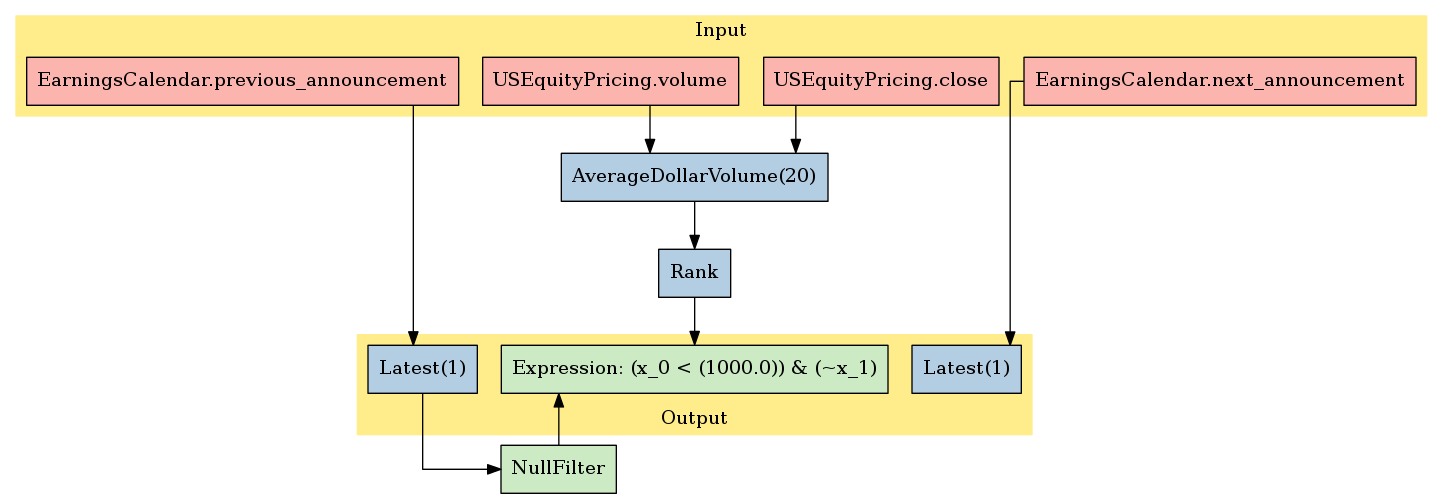

In [5]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [6]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2013-11-01', end_date='2013-11-25')
pipe_output

next_announcement  \
2013-11-01 00:00:00+00:00 Equity(2 [AA])                     NaT   
                          Equity(24 [AAPL])                  NaT   
                          Equity(62 [ABT])                   NaT   
                          Equity(64 [ABX])                   NaT   
                          Equity(67 [ADSK])                  NaT   
                          Equity(76 [TAP])            2013-11-06   
                          Equity(88 [ACI])                   NaT   
                          Equity(114 [ADBE])                 NaT   
                          Equity(122 [ADI])           2013-11-26   
                          Equity(128 [ADM])                  NaT   
                          Equity(154 [AEM])                  NaT   
                          Equity(161 [AEP])                  NaT   
                          Equity(166 [AES])           2013-11-07   
                          Equity(168 [AET])                  NaT   
                          Equity(185 [AFL])                  NaT   
                          Equity(197 [AGCO])                 NaT   
                          Equity(216 [HES])                  NaT   
                          Equity(239 [AIG])                  NaT   
                          Equity(273 [ALU])                  NaT   
                          Equity(300 [ALK])                  NaT   
                          Equity(328 [ALTR])                 NaT   
                          Equity(337 [AMAT])                 NaT   
                          Equity(338 [BEAM])                 NaT   
                          Equity(351 [AMD])                  NaT   
                          Equity(353 [AME])                  NaT   
                          Equity(357 [TWX])           2013-11-06   
                          Equity(368 [AMGN])                 NaT   
                          Equity(410 [AN])                   NaT   
                          Equity(438 [AON])                  NaT   
                          Equity(448 [APA])           2013-11-07   
...                                                          ...   
2013-11-25 00:00:00+00:00 Equity(42027 [UBNT])               NaT   
                          Equity(42118 [GRPN])               NaT   
                          Equity(42165 [INVN])               NaT   
                          Equity(42173 [DLPH])               NaT   
                          Equity(42230 [TRIP])               NaT   
                          Equity(42251 [WPX])                NaT   
                          Equity(42263 [LPI])                NaT   
                          Equity(42270 [KORS])               NaT   
                          Equity(42277 [ZNGA])               NaT   
                          Equity(42436 [SLCA])               NaT   
                          Equity(42546 [PRLB])               NaT   
                          Equity(42596 [YELP])               NaT   
                          Equity(42611 [NSM])                NaT   
                          Equity(42699 [VNTV])               NaT   
                          Equity(42707 [VIPS])               NaT   
                          Equity(42786 [MRC])                NaT   
                          Equity(42788 [PSX])                NaT   
                          Equity(42815 [SPLK])               NaT   
                          Equity(42950 [FB])                 NaT   
                          Equity(43127 [NOW])                NaT   
                          Equity(43399 [ADT])                NaT   
                          Equity(43405 [KRFT])               NaT   
                          Equity(43413 [TRLA])               NaT   
                          Equity(43512 [FANG])               NaT   
                          Equity(43694 [ABBV])               NaT   
                          Equity(43919 [LMCA])               NaT   
                          Equity(44060 [ZTS])                NaT   
                          Equity(44

Taking what we've seen from above, let's see how we'd move that into the backtester.

In [11]:
# This section is only importable in the backtester
from quantopian.algorithm import attach_pipeline, pipeline_output

# General pipeline imports
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import AverageDollarVolume

# Import the datasets available
# For use in your algorithms
# Using the full dataset in your pipeline algo
from quantopian.pipeline.data.eventvestor import EarningsCalendar

# To use built-in Pipeline factors for this dataset
from quantopian.pipeline.factors.eventvestor import (
BusinessDaysUntilNextEarnings,
BusinessDaysSincePreviousEarnings
)

def make_pipeline():
    # Create our pipeline
    pipe = Pipeline()
    
    # Screen out penny stocks and low liquidity securities.
    dollar_volume = AverageDollarVolume(window_length=20)
    is_liquid = dollar_volume.rank(ascending=False) < 1000
    
    # Create the mask that we will use for our percentile methods.
    base_universe = (is_liquid)

    # Add pipeline factors
    pipe.add(EarningsCalendar.previous_announcement.latest, 'previous_announcement')
    pipe.add(EarningsCalendar.next_announcement.latest, 'next_announcement')
    pipe.add(BusinessDaysSincePreviousEarnings(), "business_days_since")

    # Set our pipeline screens
    pipe.set_screen(is_liquid)
    return pipe

def initialize(context):
    attach_pipeline(make_pipeline(), "pipeline")
    
def before_trading_start(context, data):
    results = pipeline_output('pipeline')

Now you can take that and begin to use it as a building block for your algorithms, for more examples on how to do that you can visit our <a href='https://www.quantopian.com/posts/pipeline-factor-library-for-data'>data pipeline factor library</a>